# <center>Programma la tua prima rete neurale

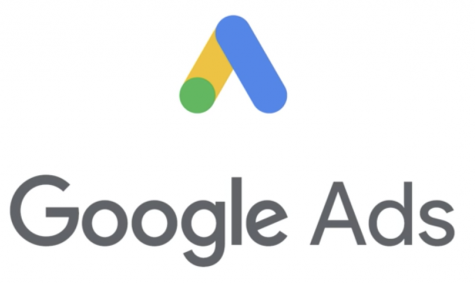

<font color="orange" size=5><center>Alessandro Cossard - targetizzare il pubblico per l'internet marketing  </center></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#esempio in 2D

In [ ]:
xf = np.array([1.1,1.4,1.5,2])

In [ ]:
yf = np.array([8.3,9,8,7.5])

In [ ]:
xv = np.array([4.4,4.6,4,5.7,4.5,5])

In [ ]:
yv = np.array([8.6,5.9,6.7,6,7.9,6.3])

In [ ]:
plt.plot(xf, yf, 'o', color = "red", label='Classe0',markersize=8)
plt.plot(xv, yv, 'o', color = "green", label='Classe1',markersize=8)
plt.xlabel('Numero di puntate al giorno')
plt.ylabel('Numero di serie già viste dello stesso genere')
plt.legend(loc='best')
plt.ylim((0, 10))
plt.show()

In [ ]:
#riorganizzo i dati per il modello

In [ ]:
zf = np.vstack((xf, yf)).T

In [ ]:
zv = np.vstack((xv, yv)).T

In [ ]:
z = np.concatenate((zf,zv),axis=0)

In [ ]:
labels=[0,0,0,0,1,1,1,1,1,1]

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit(z, labels)

In [ ]:
#faccio il predict su un punto nuovo
knn.predict([[5,7.5]])

In [ ]:
knn.predict([[2,7.5]])

In [ ]:
plt.plot(xf, yf, 'o', color = "red", label='Classe0',markersize=8)
plt.plot(xv, yv, 'o', color = "green", label='Classe1',markersize=8)
plt.plot(5,7.5,'bo',markersize=12)
plt.xlabel('Numero di puntate al giorno')
plt.ylabel('Numero di serie già viste dello stesso genere')
plt.legend(loc='best')
plt.ylim((0, 10))
plt.show()

In [ ]:
#dati delle pubblicità da social network

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
#visualizzazione dei dati

In [ ]:
df = pd.DataFrame(x)
df = df.rename(columns={0: "age", 1: "salary"})

In [ ]:
plt.plot(df['age'],df['salary'],'bo')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
#aggiungo e coloro in base alla label

In [ ]:
df['label'] = y

In [ ]:
df

In [ ]:
colors = np.where(df["label"]==0,'r','b')

In [ ]:
colors = list(colors)

In [ ]:
plt.scatter(df['age'],df['salary'],color=colors)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
#comincio a preparare il modello

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

In [ ]:
#facciamo il predict su un punto random
print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
#facciamo il predict sul test
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

In [ ]:
#visualizzo i risultati del predict in confronto al test

In [ ]:
df_test = pd.DataFrame(X_test)
df_test = df_test.rename(columns={0: "age", 1: "salary"})

In [ ]:
df_test['label'] = y_test

In [ ]:
df_test['pred'] = y_pred

In [ ]:
test_colors = np.where(df_test["label"]==0,'green','violet')

In [ ]:
predicted_colors = np.where(df_test["pred"]==0,'r','b')

In [ ]:
#confronto quelle di test verdi e viola con quelle predict rosse e blu
plt.scatter(df_test['age'],df_test['salary'],color=test_colors,)
plt.scatter(df_test['age'],df_test['salary'],color=predicted_colors,alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()